<a href="https://colab.research.google.com/github/MariaFernandaReyesLopez/Geiser/blob/main/Geiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDAD TECNOLOGICA DE TULANCINGO

* **Alumno:** Reyes Lopez Maria Fernanda
* **Matrícula:** 1718110411
* **Carrera y grupo:** IDGS 91
* **Fecha:** 10-DIC-21
* **Actividad:** 5.1 Entrenamiento no supervisado


**PROBLEMA**

Se tiene un conjunto de datos de erupciones de géiseres, y se desea clasificar para su estudio.

Los datos que se tienen son:
  
  * **TimeEruption** - tiempo de erupcióin en minutos.
  * **TimeWaiting** - tiempo de espera para la siguiente erupción.


# IMPORTAR LIBRERÍAS

In [52]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn 
import matplotlib.pyplot as plt

import tensorflow as tf 
from sklearn.cluster import KMeans # Un cluster es un grupo, en donde se almacenaran los datos
from sklearn.preprocessing import StandardScaler

# VERSIONES DE PANDAS Y TENSORFLOW

In [53]:
print("Pandas {}".format(pd.__version__))
print("Tensorflow {}".format(tf.__version__))
print("matplotlib {}".format(matplotlib.__version__))
print("sklearn {}".format(sklearn.__version__))

Pandas 1.1.5
Tensorflow 2.7.0
matplotlib 3.2.2
sklearn 1.0.1


In [54]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.8
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


# CARGAR EL DATASET

In [55]:
df = pd.read_csv("geisers.csv")

# INFORMACIÓN DEL DATAFRAME

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeEruption  272 non-null    float64
 1   TimeWaiting   272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [57]:
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [58]:
df.describe()

,TimeEruption,TimeWaiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# GRAFICAR EL DATAFRAME

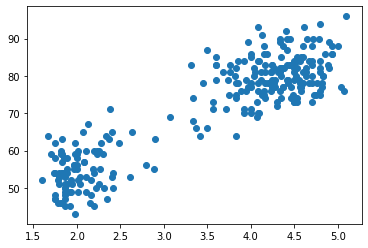

In [59]:
plt.scatter(df["TimeEruption"],df["TimeWaiting"])
plt.show()

# DATOS ALEATORIOS

In [60]:
TimeEruption = np.random.randint(100, size=100)
TimeWaiting = np.random.randint(100, size=100)

data = {
    'TimeEruption' : TimeEruption,
    'TimeWaiting' : TimeWaiting
}
df_s = pd.DataFrame(data)

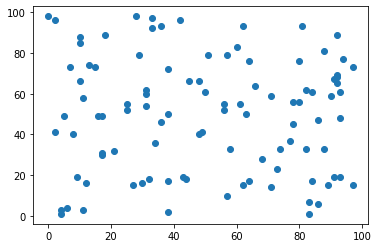

In [61]:
plt.scatter(df_s['TimeEruption'], df_s['TimeWaiting'])
plt.show()

# CONFIGURAR EL MODELO

In [62]:
model = KMeans(n_clusters=2, max_iter=100)

# ESTANDARIZAR LOS DATOS

In [63]:
df = StandardScaler().fit_transform(df)

# GRAFICAR VALORES ESTANDARIZADOS

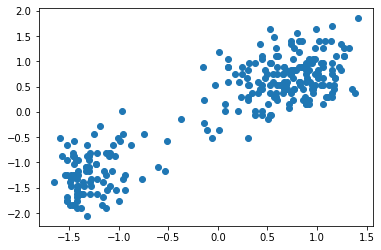

In [64]:
plt.scatter(df[:,0], df[:,1]) # Ya no tenemos las columnas anteriores, ahora tenemos un arreglo por el preprocesamiento.
plt.show()

# ENTRENAMIENTO

In [65]:
model.fit(df)

KMeans(max_iter=100, n_clusters=2)

# CENTROIDES

In [66]:
centroids = model.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

# VER LAS ETIQUETAS

In [67]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

# GRAFICAR LOS CENTROIDES

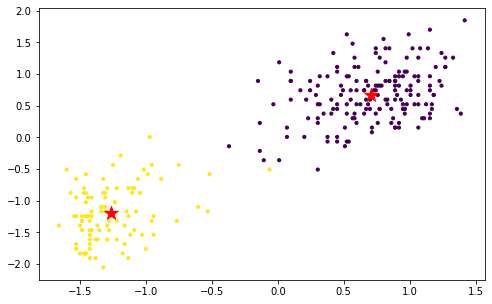

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='clusters')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=200, label="centroids")
plt.show()

# PREDICCIONES

In [69]:
new_label = model.predict([[0.5, -1.5]]) # Encontramos a que grupo pertenece un punto en estas coordenadas
new_label[0]

1

# SELECCIONAR EL NÚMERO DE CLUSTERS (TÉCNICA DEL CODO)

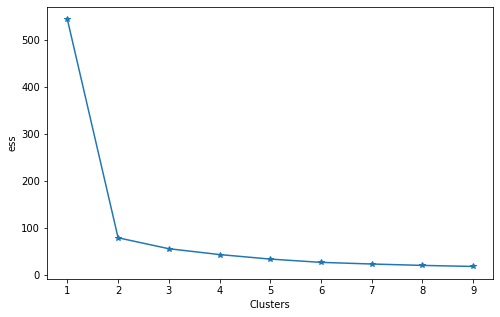

In [70]:
ess = [] # Suma de la distancia al cuadrado
list_k = list(range(1,10))

for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(df)
    ess.append(model.inertia_) # Agrupar suma de las distancias 

plt.figure(figsize=(8,5))
plt.plot(list_k,ess,'-*')
plt.xlabel('Clusters')
plt.ylabel("ess")
plt.show() 
# Tecnica para cuando no sabemos en cuantos grupos dividir nuestro grupo de datos, cuando vemos que se aplana la curva tomamos como referencia ese numero; 2

# GRAFICAR CON DISTINTOS CLUSTERS

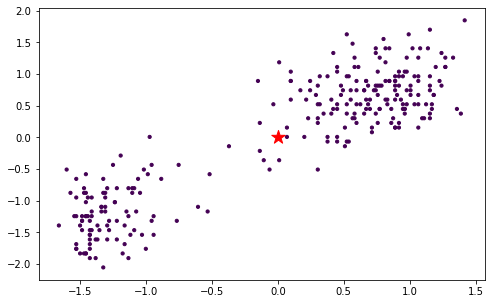

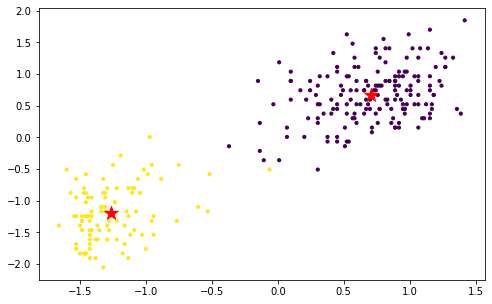

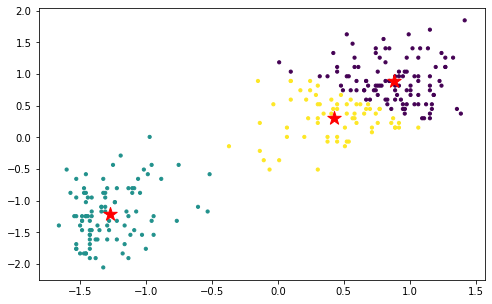

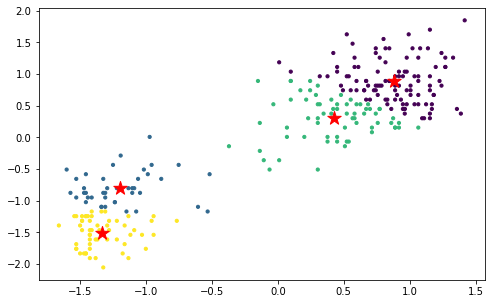

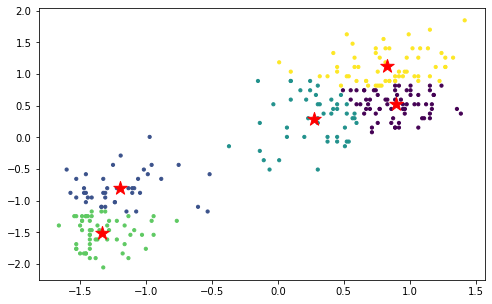

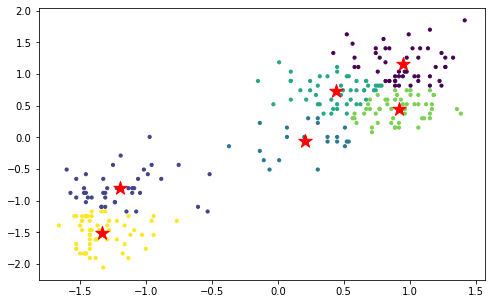

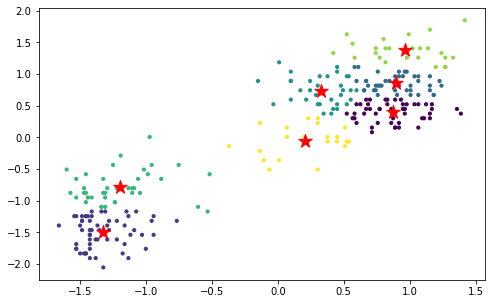

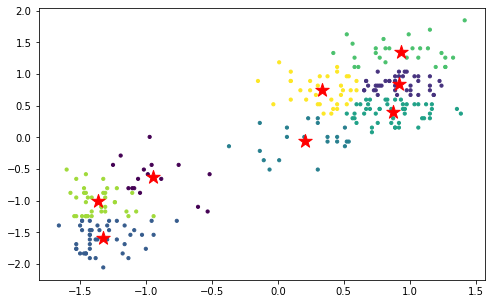

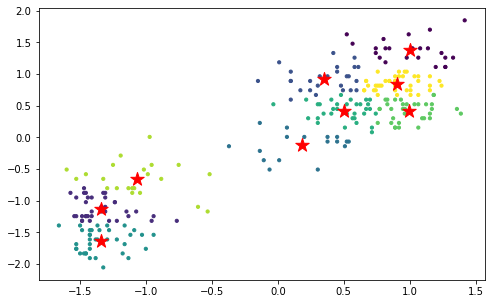

In [71]:
list_k = list(range(1,10))

for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(df)
    centroids = model.cluster_centers_
    plt.figure(figsize=(8,5))
    plt.scatter(df[:,0], df[:,1], c=model.labels_.astype(float), s=10, label='clusters')
    plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="*",s=200, label='centroids')
    plt.show() 

# **CONCLUSIÓN**

En esta práctica pude entender y tener maás claro cada uno de los pasos y las consideraciones que debemos de tener al hacer un entrenamiento no supervisado. Asi como tambien las librerias que debemos utilizar para realizar la configuración de nuestro modelo y la estandarización de los datos.


Igual vimos que ahora no tenemos etiquetas sino solo los datos y que el modelo será el encargado de darnos esas etiquetas para de esta manera poder hacer las predicciones. Sin duda las gráficas son de gran ayuda y hacen más entendible los datos y como manejarlos para tener un modelo funcional.

Al entender y saber como hacer un modelo de aprendizaje no supervisado prodemos utilizarlo en contextos del mundo real, ya que no se sabremos cuál será el resultado para un modelo predictivo, no tenemos datos sobre los resultados deseados.